#Health Care Facility Accessibility: Logistic Regression Model

Using datasets of healthcare facilities and the population distribution across cities in Sudan, we aim to investigate the accessibility of healthcare facilities based on the geographic locations of both the cities and the facilities.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.set_option('display.max_rows', 500)

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p '/content/drive/MyDrive/Omdena/Sudan/Modeling/'
%cd '/content/drive/MyDrive/Omdena/Sudan/Modeling/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Omdena/Sudan/Modeling


Since the original health care facility dataset has 1129 rows which is relatively small amount, I added additional dataset.  

Additional data source for health care facilities:  
https://data.humdata.org/dataset/health-facilities-in-sub-saharan-africa  
Sub-Saharan_health_facilities.xlsx

In [3]:
df_africa = pd.read_csv("/content/drive/MyDrive/Omdena/Sudan/Modeling/sub-saharan_health_facilities.csv")

In [4]:
df_africa.head()

,Country,Admin1,Facility_n,Facility_t,Ownership,Lat,Long,LL_source
0,Angola,Bengo,Hospital Barra Do Dande,Hospital,Govt.,-8.6560,13.4919,Google Earth
1,Angola,Bengo,Hospital Dos Dembos,Hospital,Govt.,-8.5026,14.5862,Google Earth
2,Angola,Bengo,Hospital Municipal de Ambriz,Municipal Hospital,Govt.,-7.8522,13.1307,Google Earth
3,Angola,Bengo,Hospital Municipal de Bula Atumba,Municipal Hospital,Govt.,-8.6742,14.7925,Google Earth
4,Angola,Bengo,Hospital Municipal de Dande,Municipal Hospital,Govt.,-8.5835,13.6569,Google Earth


In [5]:
df_africa['Country'].unique() #Country in the dataset

array(['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'Comoros', 'Congo', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti',
       'Equatorial Guinea', 'Eritrea', 'eSwatini', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania',
       'Togo', 'Uganda', 'Zambia', 'Zanzibar', 'Zimbabwe'], dtype=object)

In [6]:
df_africa['Ownership'].unique() #Ownership for each facilities

array(['Govt.', 'MoH', 'Public', 'FBO', nan, 'Priv├⌐ ├á but non lucratif',
       'CBO', 'Publique', 'Confessionnel', 'ONG/non-lucratif', 'NGO',
       'FBO/NGO', 'Private not for profit', 'Local authority', 'MoHQL',
       'MoHSS', 'MoHL', 'MoHL/NGO', 'Parastatal', 'MoHCDGEC', 'NGO/FBO'],
      dtype=object)

In [7]:
pd.DataFrame(df_africa)

,Country,Admin1,Facility_n,Facility_t,Ownership,Lat,Long,LL_source
0,Angola,Bengo,Hospital Barra Do Dande,Hospital,Govt.,-8.6560,13.4919,Google Earth
1,Angola,Bengo,Hospital Dos Dembos,Hospital,Govt.,-8.5026,14.5862,Google Earth
2,Angola,Bengo,Hospital Municipal de Ambriz,Municipal Hospital,Govt.,-7.8522,13.1307,Google Earth
3,Angola,Bengo,Hospital Municipal de Bula Atumba,Municipal Hospital,Govt.,-8.6742,14.7925,Google Earth
4,Angola,Bengo,Hospital Municipal de Dande,Municipal Hospital,Govt.,-8.5835,13.6569,Google Earth
...,...,...,...,...,...,...,...,...
98740,Zimbabwe,Midlands,Zhombe Rural Hospital,Rural Hospital,FBO,-18.7034,29.3849,GPS
98741,Zimbabwe,Midlands,Zvamabande Rural Health Clinic,Rural Health Clinic,MoH,-19.8018,30.1359,GPS
98742,Zimbabwe,Midlands,Zvarota Rural Health Clinic,Rural Health Clinic,MoH,-19.5565,30.2212,GPS
98743,Zimbabwe,Midlands,Zvishavane District Hospital,District Hospital,MoH,-20.3058,30.0524,GPS


In [8]:
df_s = df_africa[df_africa['Country'] == 'Sudan'] #filter only Sudan

In [9]:
df_s.head()

,Country,Admin1,Facility_n,Facility_t,Ownership,Lat,Long,LL_source
85526,Sudan,Blue Nile,Ad Damazin Hospital,Type D Hospital,Govt.,12.3071,34.2784,GPS
85527,Sudan,Blue Nile,Al Kurumuk1 Hospital,Type D Hospital,Govt.,10.0858,34.1696,GPS
85528,Sudan,Blue Nile,Al Kurumuk2 Hospital,Type D Hospital,Govt.,9.7242,34.0887,GPS
85529,Sudan,Blue Nile,Al Roseires1 Hospital,Type D Hospital,Govt.,12.2545,34.5294,GPS
85530,Sudan,Blue Nile,Al Roseires2 Hospital,Type D Hospital,Govt.,12.1046,34.3605,GPS


In [10]:
df_s.shape

(272, 8)

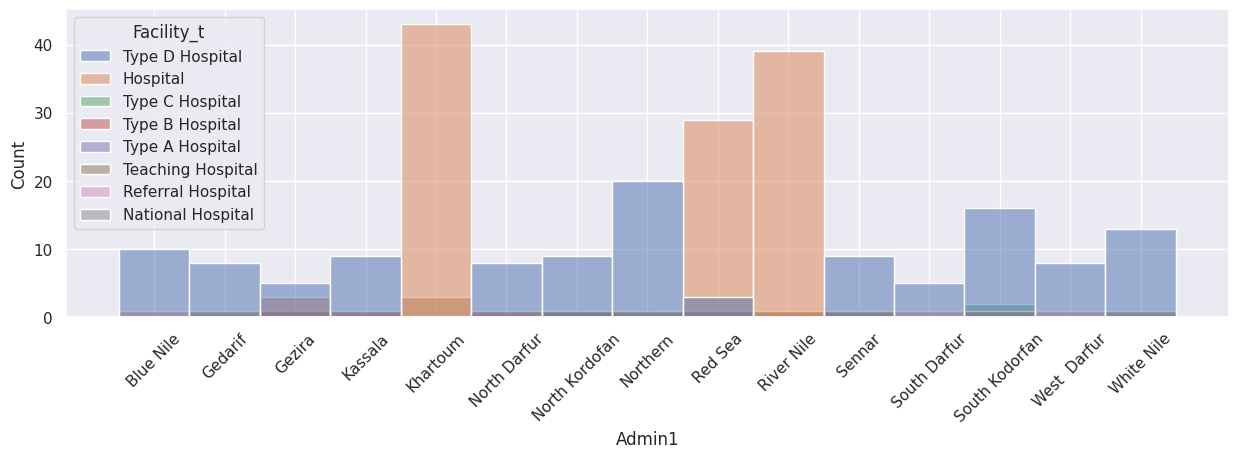

In [11]:
plt.figure(figsize=(15, 4))
sns.histplot(data=df_s, x="Admin1", hue="Facility_t")
plt.xticks(rotation=45)
plt.show()

Data source for population in Sudan:  
https://github.com/OmdenaAI/SudanChapter_AnalyzeHealthcareAccessibility/blob/main/04_Data_analysis/final_data_folder/population-by-cities-data.csv

In [12]:
df_pop = pd.read_csv("/content/drive/MyDrive/Omdena/Sudan/EDA/demographics/population-by-cities-data.csv")

In [13]:
df_pop.head()

,city,country,pop2024,latitude,longitude
0,Khartoum,Sudan,1974647,15.5518,32.5324
1,Omdurman,Sudan,1200000,15.6445,32.4777
2,Nyala,Sudan,565734,12.0489,24.8807
3,Port Sudan,Sudan,489725,19.6175,37.2164
4,Kassala,Sudan,401477,15.4510,36.4000


In [14]:
df_pop.rename({'city':'City'}, axis = 1, inplace=True)

Using Latitude and Longitude, find the closest City and State to the Hospital.

In [15]:
from geopy.distance import geodesic

cities_df = pd.DataFrame(df_pop)

new_df = pd.DataFrame(df_s)

def find_closest_city(lat, lon, cities_df):
    min_distance = float("inf")
    closest_city = None
    closest_state = None

    for _, row in cities_df.iterrows():
        city_coords = (row["latitude"], row["longitude"])
        point_coords = (lat, lon)
        distance = geodesic(city_coords, point_coords).kilometers

        if distance < min_distance:
            min_distance = distance
            closest_city = row["City"]
            #closest_state = row["State"]

    return closest_city, closest_state

results = []
for _, row in new_df.iterrows():
    city, state = find_closest_city(row["Lat"], row["Long"], cities_df)
    results.append({"Admin1": row["Admin1"], "City": city})

results_df = pd.DataFrame(results)

print(results_df)

             Admin1                 City
0         Blue Nile              Jalqani
1         Blue Nile               Kurmuk
2         Blue Nile               Kurmuk
3         Blue Nile              Jalqani
4         Blue Nile           Ar Ruseris
5         Blue Nile              Jalqani
6         Blue Nile           Ad-Damazin
7         Blue Nile           Ad-Damazin
8         Blue Nile               Kurmuk
9         Blue Nile               Kurmuk
10        Blue Nile               Kurmuk
11          Gedarif           Al Qadarif
12          Gedarif           Al Qadarif
13          Gedarif                 Doka
14          Gedarif                 Doka
15          Gedarif                 Doka
16          Gedarif                 Doka
17          Gedarif           Al Hawatah
18          Gedarif           Al Hawatah
19          Gedarif           Al Qadarif
20          Gedarif                 Doka
21           Gezira         Al Hilaliyya
22           Gezira            Wad Rawah
23           Gez

**note**:  
The results for identifying the closest city were slightly skewed. Some facilities located near state borders were assigned to the nearest city with another state, even though they were actually in a different city and state. However, from a distance perspective, it makes sense that people would visit the nearest facilities. According to the search, there are no restrictions on health insurance policies for people in Sudan, regardless of their status or state of residence. They can access any facility.

(At this stage, geographic characteristics such as mountains, rivers, and other restrictions have not been considered.)

In [16]:
print(results_df.isnull().sum())

Admin1    0
City      0
dtype: int64


In [17]:
df_s = df_s.reset_index(drop=True)

In [18]:
#df_s['State'] = results_df['State']
df_s['City'] = results_df['City']
df_s.head(10)

,Country,Admin1,Facility_n,Facility_t,Ownership,Lat,Long,LL_source,City
0,Sudan,Blue Nile,Ad Damazin Hospital,Type D Hospital,Govt.,12.3071,34.2784,GPS,Jalqani
1,Sudan,Blue Nile,Al Kurumuk1 Hospital,Type D Hospital,Govt.,10.0858,34.1696,GPS,Kurmuk
2,Sudan,Blue Nile,Al Kurumuk2 Hospital,Type D Hospital,Govt.,9.7242,34.0887,GPS,Kurmuk
3,Sudan,Blue Nile,Al Roseires1 Hospital,Type D Hospital,Govt.,12.2545,34.5294,GPS,Jalqani
4,Sudan,Blue Nile,Al Roseires2 Hospital,Type D Hospital,Govt.,12.1046,34.3605,GPS,Ar Ruseris
5,Sudan,Blue Nile,Al Roseires3 Hospital,Type D Hospital,Govt.,12.4330,34.3676,GPS,Jalqani
6,Sudan,Blue Nile,Al Roseires4 Hospital,Type D Hospital,Govt.,11.3582,34.9626,GPS,Ad-Damazin
7,Sudan,Blue Nile,Alrusurus Hospital,Hospital,Govt.,11.5155,34.2313,GPS,Ad-Damazin
8,Sudan,Blue Nile,Geissan1 Hospital,Type D Hospital,Govt.,11.0114,34.4670,GPS,Kurmuk
9,Sudan,Blue Nile,Geissan2 Hospital,Type D Hospital,Govt.,10.8711,34.9025,GPS,Kurmuk


In [19]:
df_s.rename({'Facility_t':'amenity', 'Lat':'Latitude_h', 'Long':'Longitude_h'}, axis = 1, inplace=True)

In [20]:
df_s.drop(["Country", "Admin1", "Facility_n", "Ownership", "LL_source"], inplace = True, axis = 1)

In [21]:
df_s.head()

,amenity,Latitude_h,Longitude_h,City
0,Type D Hospital,12.3071,34.2784,Jalqani
1,Type D Hospital,10.0858,34.1696,Kurmuk
2,Type D Hospital,9.7242,34.0887,Kurmuk
3,Type D Hospital,12.2545,34.5294,Jalqani
4,Type D Hospital,12.1046,34.3605,Ar Ruseris


In [22]:
df_hp2 = df_s.merge(df_pop, on = 'City', how="left")

In [23]:
df_hp2.head()

,amenity,Latitude_h,Longitude_h,City,country,pop2024,latitude,longitude
0,Type D Hospital,12.3071,34.2784,Jalqani,Sudan,9472,12.4486,34.2186
1,Type D Hospital,10.0858,34.1696,Kurmuk,Sudan,10375,10.5500,34.2833
2,Type D Hospital,9.7242,34.0887,Kurmuk,Sudan,10375,10.5500,34.2833
3,Type D Hospital,12.2545,34.5294,Jalqani,Sudan,9472,12.4486,34.2186
4,Type D Hospital,12.1046,34.3605,Ar Ruseris,Sudan,28862,11.8659,34.3869


In [24]:
df_hp2.drop(["country"], inplace = True, axis = 1)

In [25]:
df_hp2.rename({'latitude':'Latitude_p', 'longitude':'Longitude_p'}, axis = 1, inplace=True)

Cleaned data from the additional health care facility dataset

In [26]:
df_hp2.head()

,amenity,Latitude_h,Longitude_h,City,pop2024,Latitude_p,Longitude_p
0,Type D Hospital,12.3071,34.2784,Jalqani,9472,12.4486,34.2186
1,Type D Hospital,10.0858,34.1696,Kurmuk,10375,10.5500,34.2833
2,Type D Hospital,9.7242,34.0887,Kurmuk,10375,10.5500,34.2833
3,Type D Hospital,12.2545,34.5294,Jalqani,9472,12.4486,34.2186
4,Type D Hospital,12.1046,34.3605,Ar Ruseris,28862,11.8659,34.3869


Data source:  
https://github.com/OmdenaAI/SudanChapter_AnalyzeHealthcareAccessibility/blob/main/04_Data_analysis/final_data_folder/final_healthcare_facility_dataset.csv

In [27]:
df_health = pd.read_csv("/content/drive/MyDrive/Omdena/Sudan/Modeling/final_healthcare_facility_dataset.csv")

In [28]:
df_health.head()

,Unnamed: 0,name,amenity,addr_city,osm_id,osm_type,geometry,name_english,Latitude,Longitude,City,State
0,0,صيدلية الاوركيدة,pharmacy,NaN,7069338988,nodes,POINT (32.4916878 15.4509373),Orchid Pharmacy,15.450937,32.491688,Khartoum,Khartoum
1,1,صيدلية ابو المقداد 9,pharmacy,NaN,7066463168,nodes,POINT (32.489563 15.4430628),Abu Al-Muqdad Pharmacy 9,15.443063,32.489563,Khartoum,Khartoum
2,2,صيدلية اواب,pharmacy,NaN,7066472417,nodes,POINT (32.4903107 15.4404373),Awab Pharmacy,15.440437,32.490311,Khartoum,Khartoum
3,3,صيدلية التفاح الاخضر,pharmacy,NaN,6898081298,nodes,POINT (32.6189537 15.5984329),Green Apple Pharmacy,15.598433,32.618954,Khartoum,Khartoum
4,4,Africa pharmcy,pharmacy,NaN,4548525889,nodes,POINT (32.5694639 15.5330492),Africa pharmcy,15.533049,32.569464,Khartoum,Khartoum


In [29]:
df_hp = df_health.merge(df_pop, on = 'City', how="left") # Merge health dataset and population dataset

In [30]:
df_hp.head()

,Unnamed: 0,name,amenity,addr_city,osm_id,osm_type,geometry,name_english,Latitude,Longitude,City,State,country,pop2024,latitude,longitude
0,0,صيدلية الاوركيدة,pharmacy,NaN,7069338988,nodes,POINT (32.4916878 15.4509373),Orchid Pharmacy,15.450937,32.491688,Khartoum,Khartoum,Sudan,1974647,15.5518,32.5324
1,1,صيدلية ابو المقداد 9,pharmacy,NaN,7066463168,nodes,POINT (32.489563 15.4430628),Abu Al-Muqdad Pharmacy 9,15.443063,32.489563,Khartoum,Khartoum,Sudan,1974647,15.5518,32.5324
2,2,صيدلية اواب,pharmacy,NaN,7066472417,nodes,POINT (32.4903107 15.4404373),Awab Pharmacy,15.440437,32.490311,Khartoum,Khartoum,Sudan,1974647,15.5518,32.5324
3,3,صيدلية التفاح الاخضر,pharmacy,NaN,6898081298,nodes,POINT (32.6189537 15.5984329),Green Apple Pharmacy,15.598433,32.618954,Khartoum,Khartoum,Sudan,1974647,15.5518,32.5324
4,4,Africa pharmcy,pharmacy,NaN,4548525889,nodes,POINT (32.5694639 15.5330492),Africa pharmcy,15.533049,32.569464,Khartoum,Khartoum,Sudan,1974647,15.5518,32.5324


In [31]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1129 non-null   int64  
 1   name          1092 non-null   object 
 2   amenity       1109 non-null   object 
 3   addr_city     22 non-null     object 
 4   osm_id        1129 non-null   int64  
 5   osm_type      1129 non-null   object 
 6   geometry      1129 non-null   object 
 7   name_english  1092 non-null   object 
 8   Latitude      1129 non-null   float64
 9   Longitude     1129 non-null   float64
 10  City          1129 non-null   object 
 11  State         1129 non-null   object 
 12  country       1129 non-null   object 
 13  pop2024       1129 non-null   int64  
 14  latitude      1129 non-null   float64
 15  longitude     1129 non-null   float64
dtypes: float64(4), int64(3), object(9)
memory usage: 141.3+ KB


Rename some variables

In [32]:
df_hp.rename({'Latitude':'Latitude_h', 'Longitude':'Longitude_h', 'latitude': 'Latitude_p', 'longitude':'Longitude_p'}, axis = 1, inplace=True)

Drop some variables

In [33]:
df_hp.drop(["name", "Unnamed: 0", "addr_city", "geometry", "osm_type", "osm_id", "country", "name_english", "State"], inplace = True, axis = 1)

Cleaned data from the original health care facility dataset

In [34]:
df_hp.head()

,amenity,Latitude_h,Longitude_h,City,pop2024,Latitude_p,Longitude_p
0,pharmacy,15.450937,32.491688,Khartoum,1974647,15.5518,32.5324
1,pharmacy,15.443063,32.489563,Khartoum,1974647,15.5518,32.5324
2,pharmacy,15.440437,32.490311,Khartoum,1974647,15.5518,32.5324
3,pharmacy,15.598433,32.618954,Khartoum,1974647,15.5518,32.5324
4,pharmacy,15.533049,32.569464,Khartoum,1974647,15.5518,32.5324


Merge the 2 health care facility datasets

In [35]:
merged_df = pd.concat([df_hp, df_hp2], ignore_index=True)
merged_df.head()
merged_df.shape

(1401, 7)

Drop the duplicate of Latitude_h	and Longitude_h.  

In [36]:
merged_df = merged_df.drop_duplicates(subset=['Latitude_h', 'Longitude_h'], keep='first')

In [37]:
merged_df.shape

(1388, 7)

###Calculate the distance between 2 points (city and facility) based on their latitude and longitude coordinates.

In [38]:
from geopy.distance import geodesic

# Function to calculate the distance
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).km

In [40]:
merged_df['distance_km'] = merged_df.apply(
    lambda row: calculate_distance(
        row["Latitude_h"], row["Longitude_h"], row["Latitude_p"], row["Longitude_p"]
    ),
    axis=1
)
merged_df

,amenity,Latitude_h,Longitude_h,City,pop2024,Latitude_p,Longitude_p,distance_km
0,pharmacy,15.450937,32.491688,Khartoum,1974647,15.5518,32.5324,11.985223
1,pharmacy,15.443063,32.489563,Khartoum,1974647,15.5518,32.5324,12.880180
2,pharmacy,15.440437,32.490311,Khartoum,1974647,15.5518,32.5324,13.124169
3,pharmacy,15.598433,32.618954,Khartoum,1974647,15.5518,32.5324,10.621262
4,pharmacy,15.533049,32.569464,Khartoum,1974647,15.5518,32.5324,4.484830
...,...,...,...,...,...,...,...,...
1396,Type D Hospital,13.454500,32.506800,Al Kawa,10167,13.7463,32.4996,32.292899
1397,Type D Hospital,13.350400,32.554300,Kosti,345068,13.1629,32.6635,23.881946
1398,Type D Hospital,13.085700,32.048700,Tandalti,27275,13.0167,31.8667,21.164713
1399,Type D Hospital,12.728800,32.084400,Tandalti,27275,13.0167,31.8667,39.658151


###Check missing data

In [41]:
# function to check missing data
def null_agg_percent(df):
    agg = merged_df.isnull().sum().sort_values(ascending = False)
    percent = (merged_df.isnull().sum()/len(df)).sort_values(ascending = False)

    agg_percent = pd.DataFrame({"aggregate":agg, "percent": percent}).reset_index()
    agg_percent.columns = ["Column_Name","aggregate", "percent"]
    return agg_percent

In [42]:
null_agg_percent(merged_df)

,Column_Name,aggregate,percent
0,amenity,20,0.014409
1,Latitude_h,0,0.000000
2,Longitude_h,0,0.000000
3,City,0,0.000000
4,pop2024,0,0.000000
5,Latitude_p,0,0.000000
6,Longitude_p,0,0.000000
7,distance_km,0,0.000000


'amenity' has 1.4% of missing values.

In [43]:
merged_df[merged_df['amenity'].isnull()]

,amenity,Latitude_h,Longitude_h,City,pop2024,Latitude_p,Longitude_p,distance_km
73,NaN,14.427580,33.500046,Wad Medani,332714,14.4012,33.5199,3.619844
74,NaN,15.643179,32.484428,Omdurman,1200000,15.6445,32.4777,0.736056
92,NaN,15.013706,33.097394,Al Hilaliyya,17345,14.9398,33.2340,16.815913
96,NaN,15.646511,32.501708,Omdurman,1200000,15.6445,32.4777,2.583753
178,NaN,15.530687,32.677063,Khartoum,1974647,15.5518,32.5324,15.693612
340,NaN,15.525046,32.498277,Khartoum,1974647,15.5518,32.5324,4.707845
539,NaN,15.623813,32.543686,Omdurman,1200000,15.6445,32.4777,7.436563
540,NaN,15.566572,32.563350,Khartoum,1974647,15.5518,32.5324,3.700464
541,NaN,15.577111,32.570552,Khartoum,1974647,15.5518,32.5324,4.958995
673,NaN,15.546857,32.558869,Khartoum,1974647,15.5518,32.5324,2.891548


Impute the missing value with fillna() mode in 'amenity'.

In [44]:
most_frequent_value = merged_df['amenity'].mode()[0]
merged_df['amenity'] = merged_df['amenity'].fillna(most_frequent_value)

Check the numbers of amenity

In [45]:
merged_df['amenity'].value_counts()

,count
amenity,
pharmacy,861
Type D Hospital,123
clinic,120
Hospital,117
hospital,99
dentist,27
doctors,18
Type C Hospital,7
Type B Hospital,7


Check "Type D Hospital" if it has long distances

<Axes: ylabel='Latitude_h'>

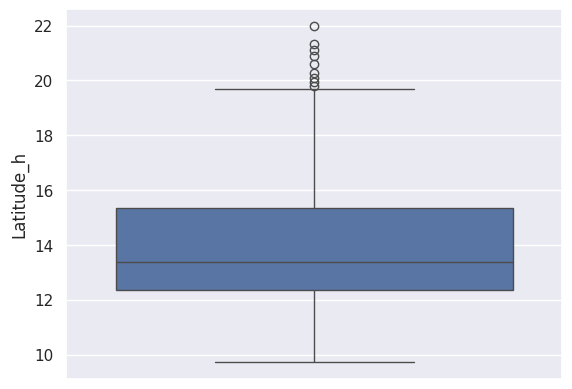

In [46]:
df_type_d = merged_df[merged_df["amenity"]== "Type D Hospital"]
sns.boxplot(df_type_d["Latitude_h"])

<Axes: ylabel='Longitude_h'>

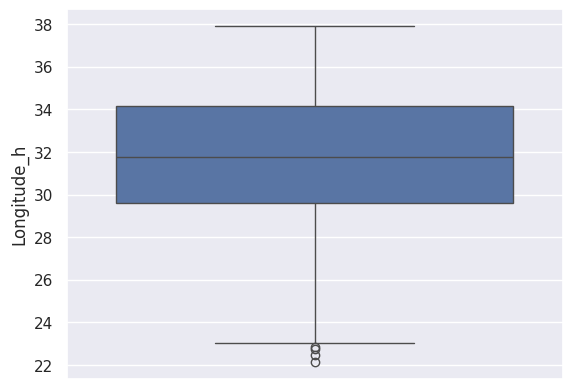

In [47]:
sns.boxplot(df_type_d["Longitude_h"])

<Axes: ylabel='distance_km'>

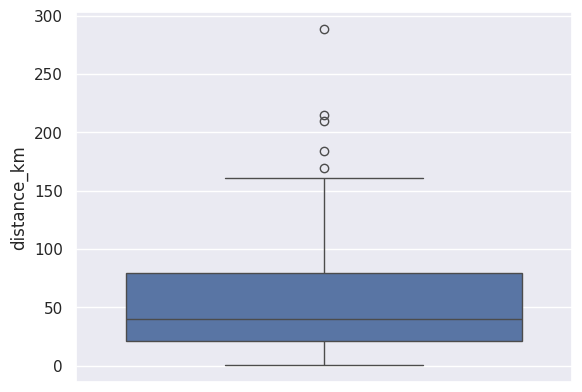

In [48]:
sns.boxplot(df_type_d["distance_km"])

"Type D Hospital" has realatively long distances overall. There are outliers.  

### Label each data point as accessible (1) or not (0) based on whether the distance is within the threshold

In [49]:
threshold_km = 5  # let say within 5km
merged_df['Accessibility'] = merged_df['distance_km'].apply(
    lambda row: 1 if row <= threshold_km else 0
)
merged_df

,amenity,Latitude_h,Longitude_h,City,pop2024,Latitude_p,Longitude_p,distance_km,Accessibility
0,pharmacy,15.450937,32.491688,Khartoum,1974647,15.5518,32.5324,11.985223,0
1,pharmacy,15.443063,32.489563,Khartoum,1974647,15.5518,32.5324,12.880180,0
2,pharmacy,15.440437,32.490311,Khartoum,1974647,15.5518,32.5324,13.124169,0
3,pharmacy,15.598433,32.618954,Khartoum,1974647,15.5518,32.5324,10.621262,0
4,pharmacy,15.533049,32.569464,Khartoum,1974647,15.5518,32.5324,4.484830,1
...,...,...,...,...,...,...,...,...,...
1396,Type D Hospital,13.454500,32.506800,Al Kawa,10167,13.7463,32.4996,32.292899,0
1397,Type D Hospital,13.350400,32.554300,Kosti,345068,13.1629,32.6635,23.881946,0
1398,Type D Hospital,13.085700,32.048700,Tandalti,27275,13.0167,31.8667,21.164713,0
1399,Type D Hospital,12.728800,32.084400,Tandalti,27275,13.0167,31.8667,39.658151,0


**1: Accessible, 0: Not accessible**

In [50]:
merged_df['Accessibility'].value_counts()

,count
Accessibility,
0,908
1,480


In [51]:
round(merged_df['Accessibility'].value_counts(normalize=True) * 100,2)

,proportion
Accessibility,
0,65.42
1,34.58


0 as Not accessible has approx. double of amount of 1 as Accessible

In [52]:
merged_df[['Accessibility', 'City']].value_counts()

Accessibility  City               
0              Khartoum               391
               Omdurman               282
1              Khartoum               207
               Omdurman               180
               Al Hasaheisa            15
0              Al Mijlad               15
               Argo                    14
1              El Daein                13
               Port Sudan              10
0              Geneina                 10
1              Kassala                  8
0              Wad Rawah                8
               Zalingei                 7
               Shendi                   7
               Sawakin                  7
1              Wad Medani               7
0              Umm Kaddadah             6
               Ad Dabbah                6
               Jalqani                  6
               Ed Damer                 6
               Wagar                    6
               El Bauga                 6
               Al Kawa                  5
               Gebeit                   5
               Doka                     5
               Talodi                   5
1              Atbara                   5
0              Kurmuk                   4
               Kassala                  4
               Tokar                    4
               Al Qadarif               4
               El Matama                4
               Al Hawatah               4
               Port Sudan               4
               Al Hilaliyya             4
               Al Hasaheisa             4
               Merowe                   3
               Wad az Zaki              3
1              Ed Damer                 3
               Dongola                  3
0              Sinnar                   3
               Kadugli                  3
               Dongola                  3
               Ad Dindar                3
               Gereida                  3
               Al Qitena                3
               El Fasher                3
               Umm Ruwaba               3
               Dilling                  3
1              Shendi                   2
0              Wad Medani               2
1              Sawakin                  2
               El Matama                2
               Merowe                   2
0              Ad-Damazin               2
1              An Nuhud                 2
               Geneina                  2
               Ar Rahad                 2
0              Tandalti                 2
               Abu Jibeha               2
               Ar Rahad                 2
               Nyala                    2
               As Suki                  2
               Barah                    2
               Al Masallamiyya          2
               Kuraymah                 2
               Kutum                    2
               Kosti                    2
               Abu Zabad                2
               Al Lagowa                2
               Al Manaqil               2
               Rabak                    2
1              Al Mijlad                1
               Kuraymah                 1
               Um Jar Al Gharbiyya      1
               Tokar                    1
               Talodi                   1
               Singa                    1
0              Ar Ruseris               1
               Atbara                   1
1              Nyala                    1
0              Berber                   1
1              Kurmuk                   1
0              El Fula                  1
               Ad Douiem                1
1              Al Manaqil               1
0              El Obeid                 1
1              Gebeit                   1
0              Singa                    1
1              El Bauga                 1
               Ad Dabbah                1
               Berber                   1
0              Maiurno                  1
1              Aroma                    1
               Ar

In [53]:
merged_df[['amenity', 'Accessibility', 'City']].value_counts()

amenity            Accessibility  City               
pharmacy           0              Khartoum               306
                                  Omdurman               221
                   1              Khartoum               165
                                  Omdurman               135
clinic             0              Khartoum                29
hospital           0              Khartoum                29
clinic             0              Omdurman                28
hospital           1              Omdurman                16
pharmacy           1              Al Hasaheisa            14
Hospital           0              Omdurman                14
clinic             0              Al Mijlad               13
                   1              Khartoum                12
hospital           1              Khartoum                12
clinic             1              Omdurman                12
hospital           0              Omdurman                11
dentist            0              Khartoum                11
Hospital           0              Khartoum                10
Type D Hospital    0              Argo                    10
dentist            1              Khartoum                10
Hospital           1              Omdurman                 9
                   0              Shendi                   7
                   1              Khartoum                 6
Type D Hospital    0              Umm Kaddadah             6
Hospital           1              Port Sudan               6
clinic             1              El Daein                 6
Type D Hospital    0              Jalqani                  6
pharmacy           1              Wad Medani               6
doctors            0              Khartoum                 6
Hospital           0              El Bauga                 6
                                  Ed Damer                 6
Type D Hospital    0              Wagar                    5
Hospital           0              Sawakin                  5
Type D Hospital    0              Talodi                   5
Hospital           0              Gebeit                   5
doctors            0              Omdurman                 4
Type D Hospital    0              Kurmuk                   4
                                  Zalingei                 4
                                  Doka                     4
Hospital           0              El Matama                4
pharmacy           1              Kassala                  4
Type D Hospital    0              Geneina                  4
hospital           0              Geneina                  4
pharmacy           1              El Daein                 4
                   0              Wad Rawah                3
Type D Hospital    0              Umm Ruwaba               3
                                  Al Kawa                  3
hospital           1              Atbara                   3
Type D Hospital    0              Ad Dabbah                3
                                  Ad Dindar                3
                                  Al Qitena                3
                                  Al Qadarif               3
Hospital           0              Tokar                    3
dentist            0              Omdurman                 3
hospital           1              Port Sudan               3
dentist            1              Omdurman                 3
Teaching Hospital  1              Omdurman                 3
Type D Hospital    0              Gereida                  3
hospital           0              Ad Dabbah                3
Hospital           1              Ed Damer                 3
Type D Hospital    0              Kuraymah                 2
                                  Merowe                   2
                                  Kassala                  2
                                  Rabak                    2
                                  El Fasher                2
                                  Sawakin 

In [54]:
filtered_df = merged_df.query("amenity == 'Type D Hospital'")
filtered_df[['Accessibility','amenity', 'City']].value_counts()

Accessibility  amenity          City        
0              Type D Hospital  Argo            10
                                Jalqani          6
                                Umm Kaddadah     6
                                Talodi           5
                                Wagar            5
                                Doka             4
                                Kurmuk           4
                                Zalingei         4
                                Geneina          4
                                Al Qitena        3
                                Gereida          3
                                Al Kawa          3
                                Umm Ruwaba       3
                                Ad Dindar        3
                                Ad Dabbah        3
                                Al Qadarif       3
                                Tandalti         2
                                Sawakin          2
                                Rabak            2
                                Merowe           2
                                Wad az Zaki      2
                                Kuraymah         2
                                Kassala          2
                                Kadugli          2
                                Abu Jibeha       2
                                Al Lagowa        2
                                El Fasher        2
                                Dongola          2
                                Dilling          2
                                As Suki          2
                                Al Hasaheisa     2
                                Ar Rahad         2
                                Al Mijlad        2
                                Al Hawatah       2
                                El Fula          1
1              Type D Hospital  Aroma            1
                                Argo             1
0              Type D Hospital  Ad Douiem        1
                                Ad-Damazin       1
                                Wad Rawah        1
                                Wad Medani       1
                                Sinnar           1
                                Tokar            1
                                Al Manaqil       1
                                Abu Zabad        1
                                An Nuhud         1
                                Nyala            1
                                Ar Ruseris       1
                                Kutum            1
                                Barah            1
                                Kosti            1
1              Type D Hospital  Kurmuk           1
Name: count, dtype: int64

**Insight**  
The accessibility of 'Type D Hospitals' is 3 out of 123, which is significantly low. This suggests that 'Type D Hospitals' are generally located at a considerable distance from the city centers, with most of them being more than 5 kilometers away.

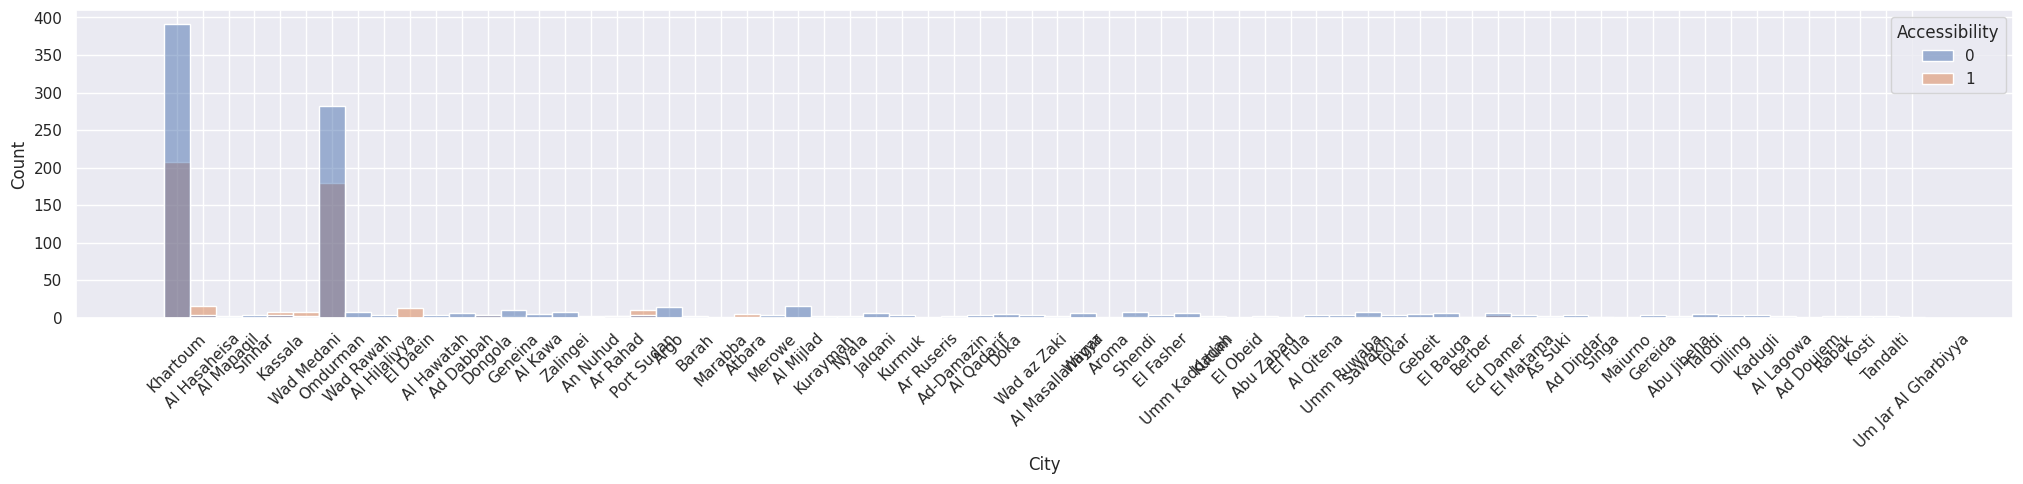

In [56]:
plt.figure(figsize=(25, 4))
sns.histplot(data=merged_df, x="City", hue="Accessibility")
plt.xticks(rotation=45)
plt.show()

In [57]:
merged_df['Accessibility'].isnull().sum()

0

In [58]:
# Deep copy
df = merged_df.copy()

In [60]:
# Create y(dependent variable)
y = df['Accessibility']
# Drop the dependent variable from the dataframe and create the X(independent variable)
X = df.drop(['Accessibility', "City"], axis=1, inplace = True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 0 to 1400
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   amenity      1388 non-null   object 
 1   Latitude_h   1388 non-null   float64
 2   Longitude_h  1388 non-null   float64
 3   pop2024      1388 non-null   int64  
 4   Latitude_p   1388 non-null   float64
 5   Longitude_p  1388 non-null   float64
 6   distance_km  1388 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 86.8+ KB


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [63]:
# Create dummy variables for the categorical variables
X = pd.get_dummies(df,columns = df.select_dtypes(include = ["object"]).columns.tolist(), drop_first = True)

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 0 to 1400
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude_h                 1388 non-null   float64
 1   Longitude_h                1388 non-null   float64
 2   pop2024                    1388 non-null   int64  
 3   Latitude_p                 1388 non-null   float64
 4   Longitude_p                1388 non-null   float64
 5   distance_km                1388 non-null   float64
 6   amenity_Referral Hospital  1388 non-null   bool   
 7   amenity_Teaching Hospital  1388 non-null   bool   
 8   amenity_Type A Hospital    1388 non-null   bool   
 9   amenity_Type B Hospital    1388 non-null   bool   
 10  amenity_Type C Hospital    1388 non-null   bool   
 11  amenity_Type D Hospital    1388 non-null   bool   
 12  amenity_clinic             1388 non-null   bool   
 13  amenity_dentist            1388 non-null   bool   
 1

In [65]:
X.head()

,Latitude_h,Longitude_h,pop2024,Latitude_p,Longitude_p,distance_km,amenity_Referral Hospital,amenity_Teaching Hospital,amenity_Type A Hospital,amenity_Type B Hospital,amenity_Type C Hospital,amenity_Type D Hospital,amenity_clinic,amenity_dentist,amenity_doctors,amenity_hospital,amenity_pharmacy
0,15.450937,32.491688,1974647,15.5518,32.5324,11.985223,False,False,False,False,False,False,False,False,False,False,True
1,15.443063,32.489563,1974647,15.5518,32.5324,12.880180,False,False,False,False,False,False,False,False,False,False,True
2,15.440437,32.490311,1974647,15.5518,32.5324,13.124169,False,False,False,False,False,False,False,False,False,False,True
3,15.598433,32.618954,1974647,15.5518,32.5324,10.621262,False,False,False,False,False,False,False,False,False,False,True
4,15.533049,32.569464,1974647,15.5518,32.5324,4.484830,False,False,False,False,False,False,False,False,False,False,True


In [66]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [67]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Accessible', 'Not Accessible'], yticklabels=['Accessible', 'Not Accessible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Adjustmnet by RobustScaler**  
The coefficient of 'Type D Hospitals' was significanly negative impact to the performance of the model before the adjustment. This is because most of 'Type D Hospitals' were not accessible which means they have long distances. Long distance negatively impacts to the model. To improve the model performance, I use RobustScaler to reduce the impact from 'Type D Hospitals'. RobustScaler is robust for outliers that 'Type D Hospitals' has many outliers.

In [68]:
#scale the feature data
from sklearn.preprocessing import RobustScaler
ss = RobustScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)  #to prevent data leakage, we will only transform but not fit the test data.

In [69]:
# Defining the Logistic regression model
lr = LogisticRegression(class_weight= {0: .2, 1: .8},random_state =1)
# Fitting the model on the training data
lr.fit(X_train_std, y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       646
           1       0.77      1.00      0.87       325

    accuracy                           0.90       971
   macro avg       0.88      0.92      0.89       971
weighted avg       0.92      0.90      0.90       971



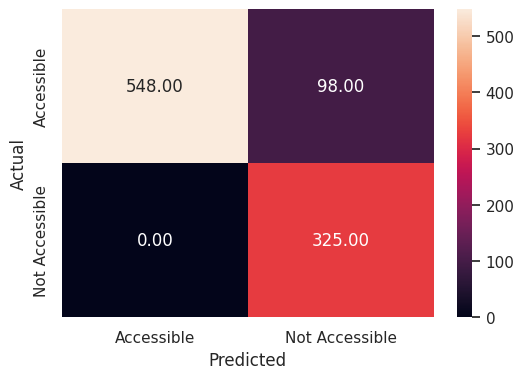

In [70]:
#Predict for train set
y_train_pred = lr.predict(X_train_std)
#checking the performance on the train dataset
metrics_score(y_train, y_train_pred)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       1.00      0.84      0.92       262
           1       0.79      1.00      0.88       155

    accuracy                           0.90       417
   macro avg       0.90      0.92      0.90       417
weighted avg       0.92      0.90      0.90       417



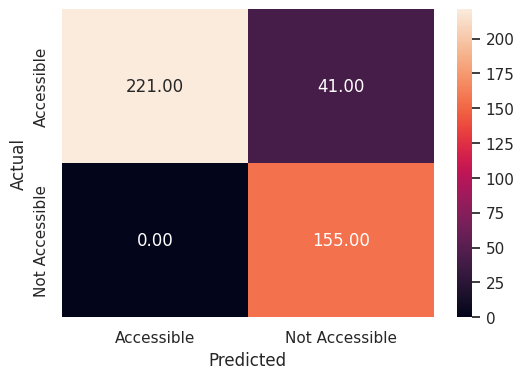

In [71]:
#Predict for test set
y_test_pred = lr.predict(X_test_std)
#checking the performance on the test dataset
metrics_score(y_test, y_test_pred)

#### Let's check the coefficients, and check which variables are important and how they affect the accessibility

In [72]:
# Printing the coefficients of logistic regression
coef = pd.DataFrame(zip(X_train.columns, np.transpose(lr.coef_.tolist()[0])), columns=['features', 'coef'])
coef.sort_values(by = 'coef', ascending = False)

,features,coef
4,Longitude_p,0.621271
7,amenity_Teaching Hospital,0.340898
3,Latitude_p,0.328901
13,amenity_dentist,0.145590
2,pop2024,0.099157
16,amenity_pharmacy,0.091862
8,amenity_Type A Hospital,-0.000651
9,amenity_Type B Hospital,-0.007081
11,amenity_Type D Hospital,-0.008099
15,amenity_hospital,-0.048518


**Insights**  
<font color = blue> Positive impact:</font>   
Longitude_p	0.621271  
amenity_Teaching Hospital	0.340898  
Latitude_p	0.328901    
amenity_dentist	0.145590    
pop2024	0.099157    
amenity_pharmacy	0.091862    

<font color = blue> Negative impact:</font>  
amenity_Referral Hospital	-0.123582    
amenity_doctors	-0.189034  
Latitude_h	-0.437435   
Longitude_h	-1.145823    
distance_km	<font color = red> -6.516139 </font>     


The number of facilities, as well as 'Longitude_p' and 'Latitude_p', have a positive impact on accessibility. In contrast, 'distance_km', 'Latitude_h', and 'Longitude_h' exhibit a strong negative impact on accessibility.








In [73]:
#plot precision-recall curve to help find the optimal threshold
from sklearn.metrics import precision_recall_curve

In [74]:
# Change the threshold of the classifier, in order to do that we need the prediction output to be probability.
lr_mod = LogisticRegression(class_weight= {0: .2, 1: .8},random_state =1)
lr_mod.fit(X_train_std,y_train)
THRESHOLD = 0.50
y_test_pred_mod = lr_mod.predict_proba(X_test_std)[:,1]
y_test_pred_mod_cl = np.where(y_test_pred_mod>THRESHOLD,1,0)

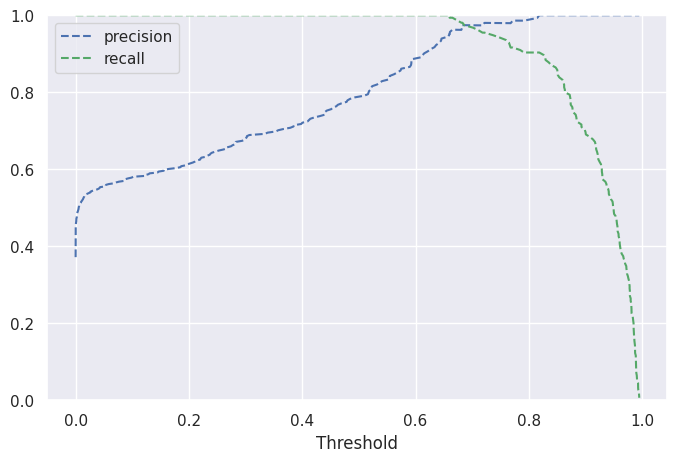

In [75]:
# Plot values of precisions, recalls, and thresholds
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_test, y_test_pred_mod)

plt.figure(figsize = (8, 5))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')

plt.ylim([0, 1])
plt.show()

**Insights**  
A threshold of 0.71 represents the best balance between precision and recall to optimize performance.

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       262
           1       0.97      0.96      0.97       155

    accuracy                           0.98       417
   macro avg       0.98      0.97      0.97       417
weighted avg       0.98      0.98      0.98       417



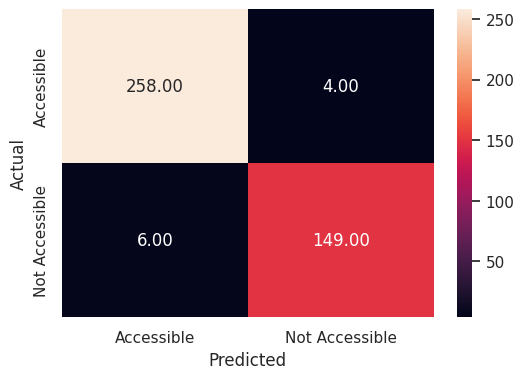

In [76]:
#if we use 0.71 as the threshold
lr_mod_70 = LogisticRegression(class_weight= {0: .2, 1: .8},random_state =1)
lr_mod_70.fit(X_train_std,y_train)
THRESHOLD = 0.71
y_test_pred_mod_70 = np.where(lr_mod_70.predict_proba(X_test_std)[:,1]>THRESHOLD,1,0)
metrics_score(y_test, y_test_pred_mod_70)

**Insights**    
Overall metrics are very high 96-98%. It may be overfitting.










###Investigate if it is overfitting

**1, Cross-validation scores**

In [77]:
from sklearn.model_selection import cross_val_score

# let's try k=5 (k-fold cross-validation)
cv_scores = cross_val_score(lr_mod_70, X_train_std, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

Cross-validation scores: [0.89230769 0.8814433  0.89175258 0.92268041 0.87628866]
Mean accuracy: 0.8929
Standard deviation: 0.0161


**Insight**  
In cross-validation scores, the mean accuracy is 89.29% while the accuracy of the test data is 98%.  
The big gap of 9% may indicate the possibility of overfit.  



**2,Learning Curve**

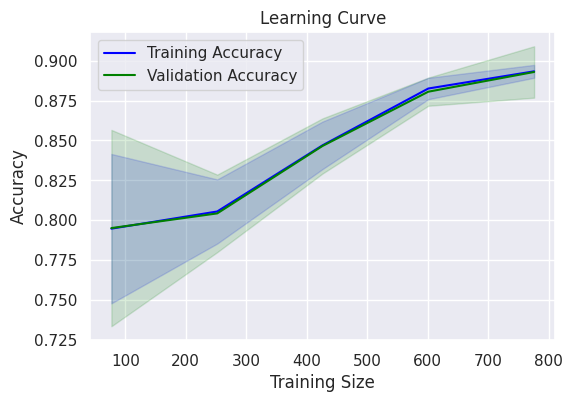

In [78]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(lr_mod_70, X_train_std, y_train, cv=5, scoring='accuracy')

# Mean and the standard validation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.15)
plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="green")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.15)
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

**Insights**  
Check if there is any gap between training score and validation score.  
The 2 scores almost same without any gap which means there is enough data and training data and validate data are appropriate balance to the model.  The model learned enough from the train data and predicted appropriately in the validate data.  

**3, Shap**  

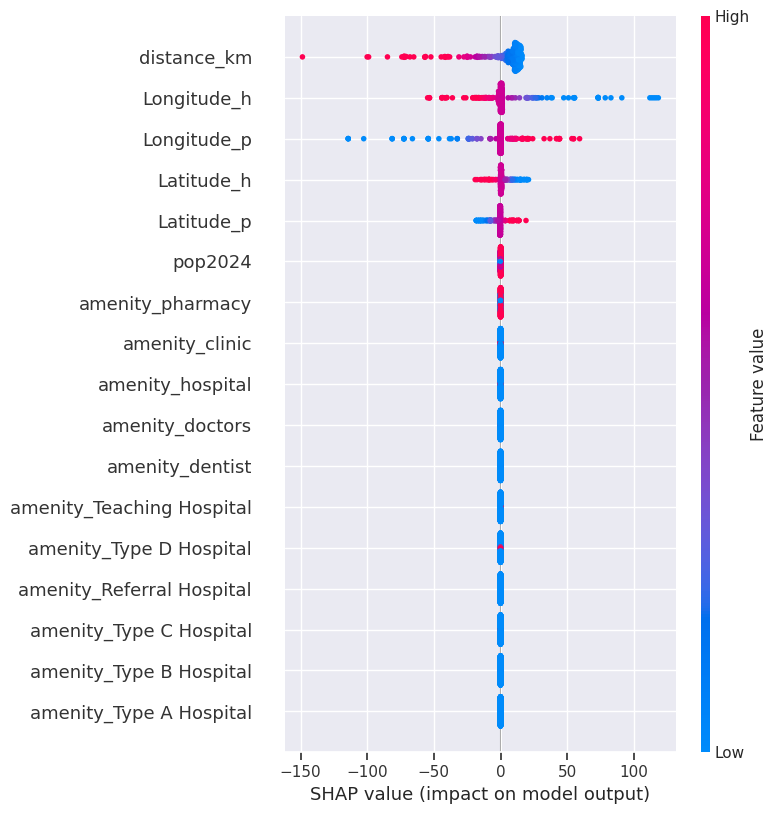

In [79]:
!pip install shap
import shap

explainer = shap.Explainer(lr_mod_70, X_train_std)
# X_train and X_test are pandas DataFrames with original feature names
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

# SHAP explainer
explainer = shap.Explainer(lr_mod_70, X_train_std)
shap_values = explainer(X_test_std)

# Summary plot with proper feature names
shap.summary_plot(shap_values, X_test_std)